## Programming Assignment 5
#### In this assignment, you will be implementing Tomasi-Kanade	Factorization algorithm	for Rigid Structure from Motion.

### Task 1
#### Load the data file and generate a 2D image dataset	by generating an orthographic camera with optical axis paralle to the XY plane, which rotates around the teapot	in 10° increments and always looks towards the center of the object
#### Note: Code for loading the point cloud and visualizing it has been given to you. Further build on it and take images of the teapot and visualize them

In [0]:
from scipy.io import loadmat
x = loadmat('teapot.mat')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
a = []
b = []
c = []
for points in x['verts']:
    a.append(points[0])
    b.append(points[1])
    c.append(points[2])
print(len(b))

306


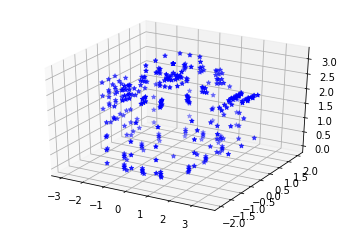

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a,b,c, c='b', marker='*')

In [0]:
### Your implementation comes here
import math
import numpy as np
intrinsic = np.array([[1, 0, 0],[0, 1, 0]]) # shape 2*3

def rotation_matrix_y(angle):
    rot_angle=math.radians(angle)
    R = np.array([[math.cos(rot_angle),0,math.sin(rot_angle)],[0,1,0],[-math.sin(rot_angle),0,math.cos(rot_angle)]])
    return R      

prev 2d pts shape:  (3, 306)
r mat np:  (36, 2, 3)
(36, 2, 306)


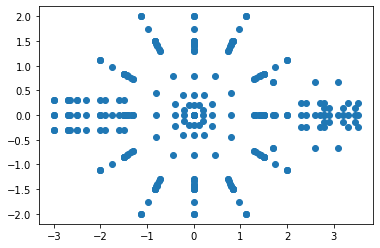

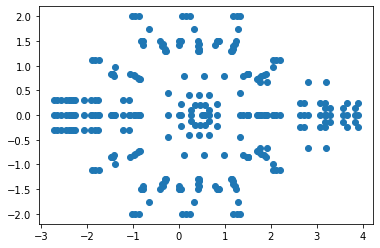

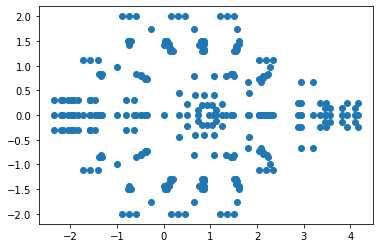

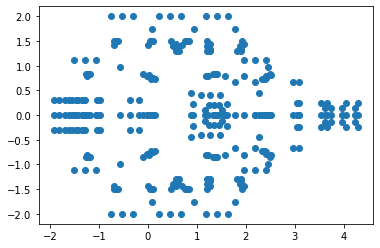

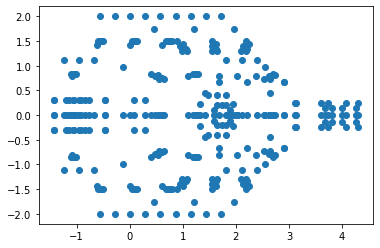

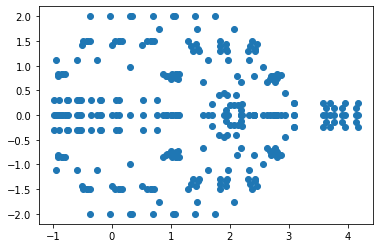

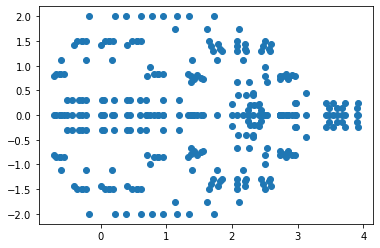

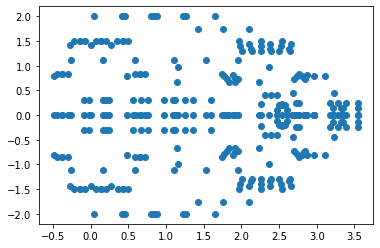

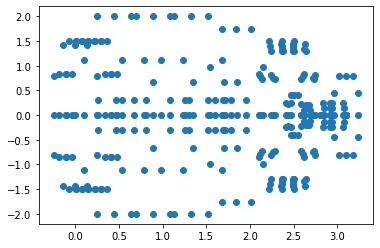

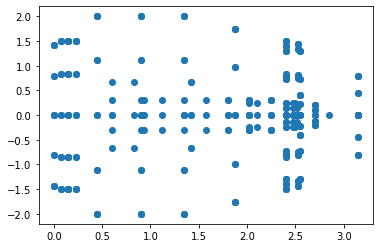

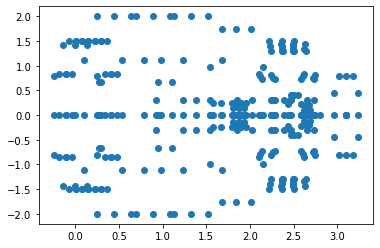

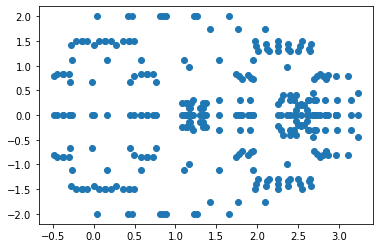

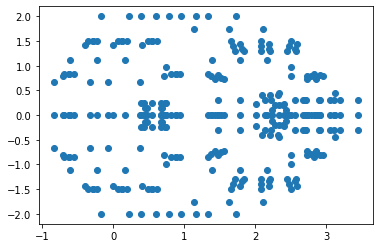

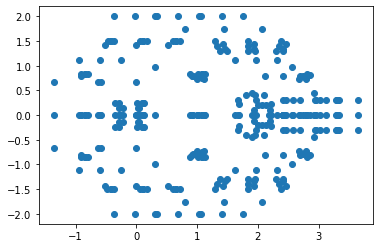

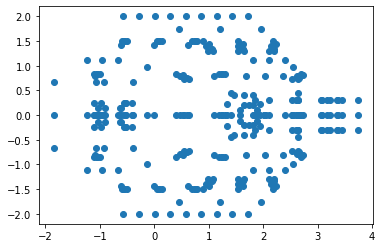

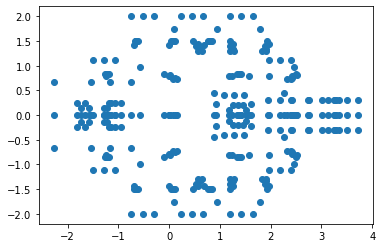

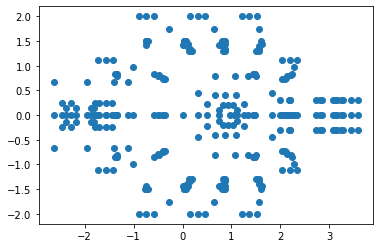

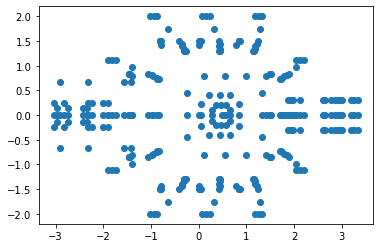

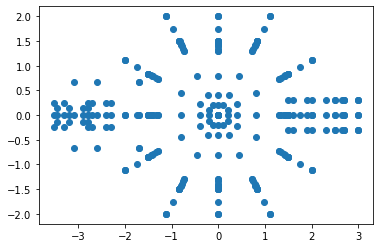

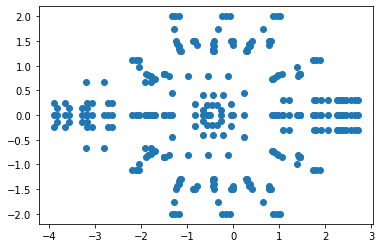

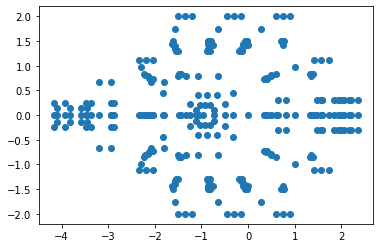

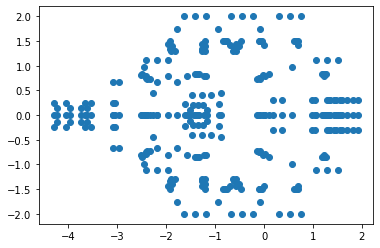

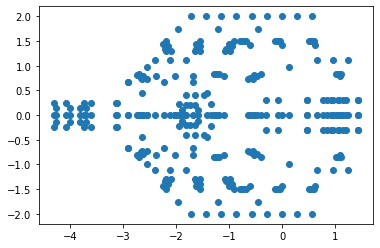

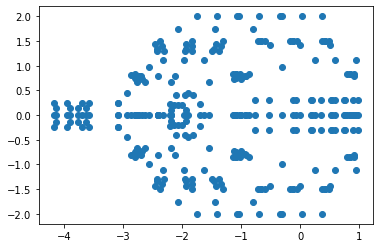

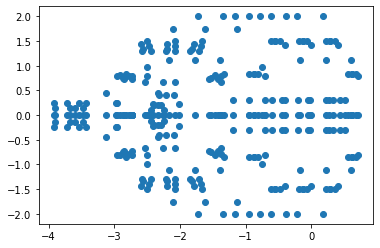

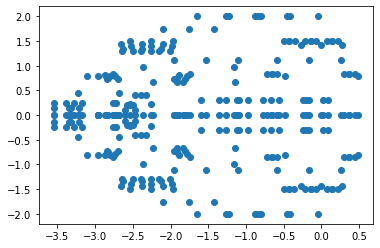

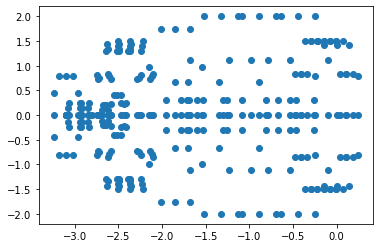

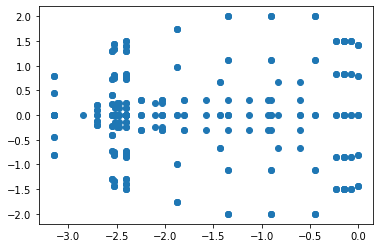

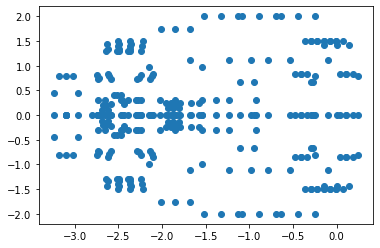

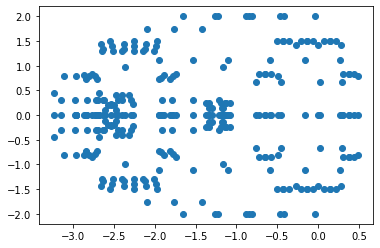

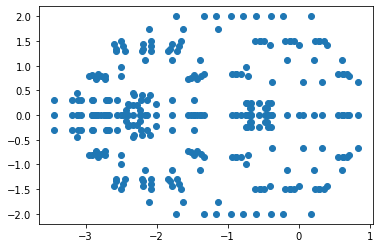

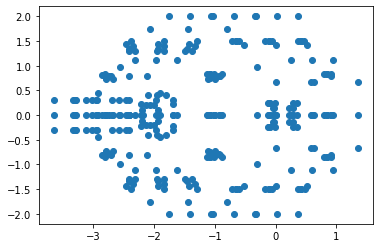

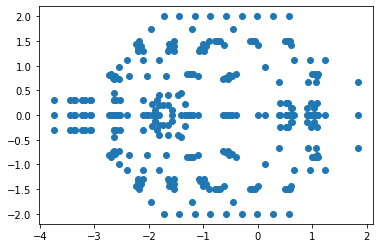

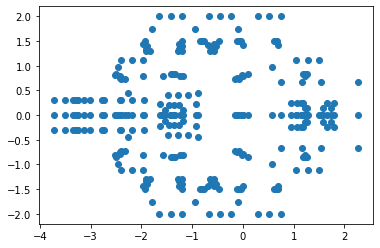

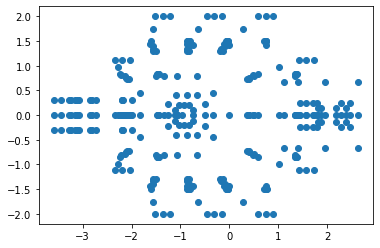

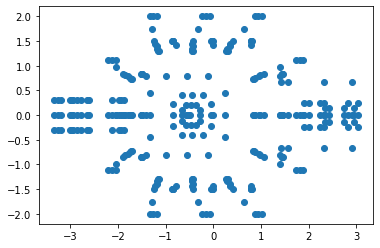

In [58]:
### Your implementation comes here
# Hint: new2Dpts = K[R|T]*3DPoints
import numpy as np
R_mat_list = []
points = np.array([a,b,c])
print("prev 2d pts shape: ", points.shape)

for angle in range (0,360,10):
  R = rotation_matrix_y(angle) #3*3 ,atrix
  # print(intrinsic.shape)
  R_mat = np.matmul(intrinsic,R) #R_mat is 2*3 = (2*3) * (3*3)
  R_mat_list.append(R_mat)
  # print("R_mat shape: ", R_mat.shape)

# R_mat = np.array(R_mat_list)
R_mat_list = np.array(R_mat_list)#a list of 36 rotation matrix
print("r mat np: ", R_mat_list.shape)
new2Dpts = np.matmul(R_mat_list,points) 
# new2Dpts = []
# for i in range (len(R_mat_list)):
#   new2Dpts.append(np.matmul(R_mat_list,points))


# print("R_mat_list: ", len(R_mat_list))
# print("points: ", points.shape)
# print("new2D: ", len(new2Dpts))
# new2Dpts = np.array(new2Dpts)
print(new2Dpts.shape)

for x in new2Dpts:
  plt.scatter(x[0],x[1])
  plt.show()

### Task 2
#### Use the data generated in previous task to generate a W matrix, and use that as input in Tomasi Kanade Factorization method to compute the 3D structure

In [54]:
### Your implementation for Tomasi Kanade Factorization method comes here

#W = R * S
# S = [(x1,y1,z1),...(xp,yp,zp)]

#initializing W
W = []
for pts in new2Dpts:
  W.append(pts[0])
  W.append(pts[1])

W = np.array(W)
# print(W.shape)

#finding SVD of W
U,D,V = np.linalg.svd(W)

#filtering U
U = U[:,:3]
# print("Ushape : ", U.shape)

#filtering D
diag_mat = np.zeros((3,3))
D = D[:3]
np.fill_diagonal(diag_mat, D) #3*3
D = diag_mat
# print(diag_mat)

#filtering V
V = V[:3,:]
# print("Vshape: ", V.shape)

#making S(hat):
S_hat = np.matmul(D,V)
# print("S_hat: ", S_hat.shape)

#Each row in R(hat corresponds to an image)
R_hat = U
print("R_hat: ", R_hat.shape)

#now

# row.append(row1)
# row.append(row2)
# row.append(row3)

# print(len(row))

row = []
b_list = []
def row_matrix(r1,r2,r3,r4,r5,r6):
  row1 = [r1 ** 2, 2 * r1 * r2, r1 * r3, (r1 * r3) + (r2 ** 2), 2 * r2 * r3, r3 ** 2]
  row2 = [r1 * r4, (r2 * r4) + (r1 * r5), r1 * r6, (r3 * r4) + (r2 * r5), (r3 * r5) + (r2 * r6), r3 * r6]
  row3 = [r4 ** 2, 2 * r4 * r5, r4 * r6, (r4 * r6) + (r5 ** 2), r5 * r6, r6 ** 2]
  # print("row1: ", np.array(row1))
  row.append(row1)
  b_list.append(1)
  
  row.append(row2)
  b_list.append(0)
  
  row.append(row3)
  b_list.append(1)
  


R_hat_rows = R_hat.shape[0]
for i in range (0,R_hat_rows,2):
  r1,r2,r3 = R_hat[i][0],R_hat[i][1],R_hat[i][2]
  r4,r5,r6 = R_hat[i+1][0],R_hat[i+1][1],R_hat[i+1][2]
  row_matrix(r1,r2,r3,r4,r5,r6)
  # print("r1 : ", r1)

R = np.asarray(row)
 
print("R shape : ", R.shape)

b_list = np.asarray(b_list)
print("b: ", b_list.shape)

R_final = np.matmul(R.T,R)
R_final = np.matmul(np.linalg.inv(R_final),R.T)

print("R_final: ", R_final.shape)

Q = np.matmul(R_final,b_list)

# Q = np.asarray(Q)
print("Q shape: ", Q.shape)
print(Q)

print(Q[1])
q1,q2,q3,q4,q5,q6 = Q[0],Q[1],Q[2],Q[3],Q[4],Q[5]
QQt = np.array([[q1,q2,q3],
                [q2,q4,q5],
                [q4,q5,q6]])
# Q = Q.T
# print(QQt)
Q = np.linalg.cholesky(QQt)

S = np.matmul(np.linalg.inv(Q),S_hat)
print(S_hat.shape)
print(S.shape)
# print(S)

R_hat:  (72, 3)
R shape :  (108, 6)
b:  (108,)
R_final:  (6, 108)
Q shape:  (6,)
[ 1.79998613e+01 -6.75918736e-04 -1.38711930e-04  1.80000001e+01
 -1.35185309e-03  3.60001387e+01]
-0.0006759187363397068
(3, 306)
(3, 306)


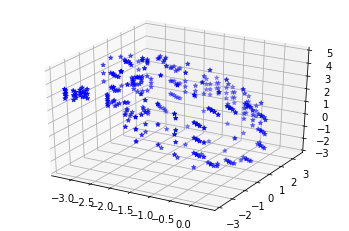

In [55]:
## Plot the reconstructed mode

# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the reconstructed 3D points are 
# in variables a1, b1 and c1 respectively, the reconstructed model can be plotted as:
a1 = S[0]
b1 = S[1]
c1 = S[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a1,b1,c1, c='b', marker='*')

In [56]:
## Evaluate your reconstruction
# In the base code above we copied the x, y and z component of the 3D points
# in teapot 3D model that we loaded from teapot.mat in variables a, b, and c respectively
# Assuming the x, y and z component of the 3D points that you have reconstructed are 
# in variables a1, b1 and c1 respectively, the error in reconstruction can be calcualted as:

a1 = S[0]
b1 = S[1]
c1 = S[2]

print("a : ", len(a))
print("b : ", len(b))
print("c : ", len(c))

print("a1 : ", len(a1))
print("b1 : ", len(b1))
print("c1 : ", len(c1))

err = 0.0
j = 0
for i in range(len(a1)):
  err = err + math.sqrt( ((a1[i]-a[i])*(a1[i]-a[i])) + ((b1[i]-b[i])*(b1[i]-b[i])) + ((c1[i]-c[i])*(c1[i]-c[i])) )
  j=j+1
  
print ("Mean Euclidean Error : ",(err/j))

a :  306
b :  306
c :  306
a1 :  306
b1 :  306
c1 :  306
Mean Euclidean Error :  3.5518898862390236
